In [3]:
import polars as pl
import matplotlib.pyplot as plt

In [39]:
customHeaders = ["Rank","ExecutionTime","IdleTime"]
df15 = pl.read_csv(r"mpi_results_queen-15-d2.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)
df10 = pl.read_csv(r"mpi_results_queen-10-d2.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)
df13 = pl.read_csv(r"mpi_results_queen-13-d2.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)
df16 = pl.read_csv(r"mpi_results_queen-16-d2.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)

In [34]:
def plot_idleTime(df: pl.DataFrame, queens, ax=None):
    if ax is None:
        ax = plt.gca()  # Get the current active axis if none is provided
    ax.bar(df["Rank"], df["IdleTime"])
    ax.set_xlabel("Worker")
    ax.set_ylabel("Idle Time (s)")
    ax.set_title(f"N = {queens}, depth = 2")
    ax.set_xticks(range(len(df["Rank"])))
    ax.set_xticklabels(df["Rank"])


In [6]:
df10.filter(pl.col("Rank") > 0)

Rank,ExecutionTime,IdleTime
i64,f64,f64
1,0.070579,0.064545
2,0.079955,0.073852
3,0.070704,0.053869
4,0.080379,0.073894
5,0.078854,0.067576
6,0.080266,0.071157
7,0.070599,0.061413
8,0.079985,0.074131
9,0.080386,0.066139


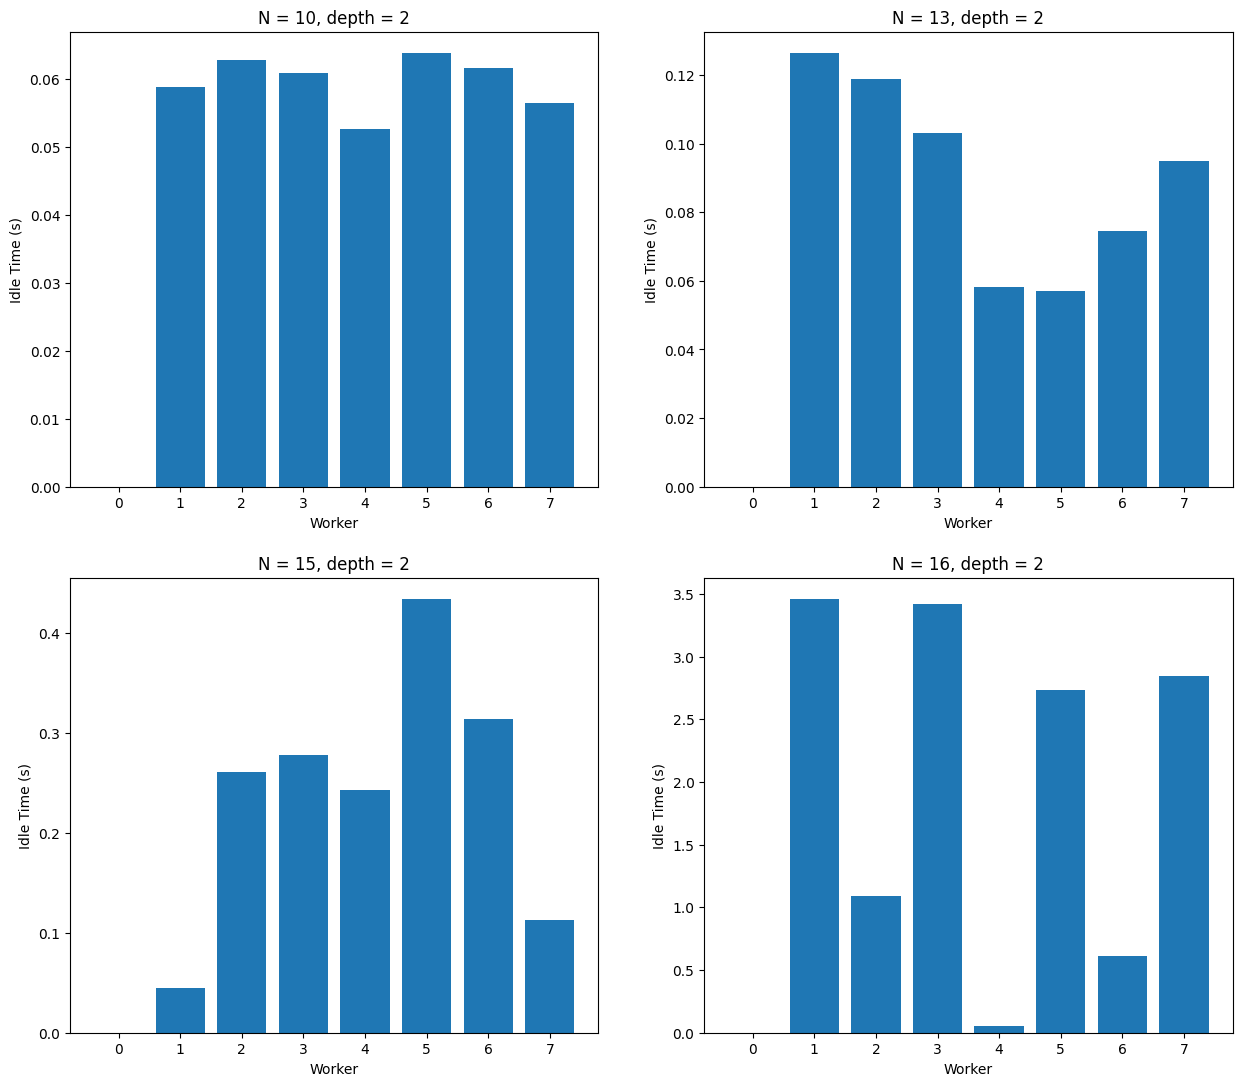

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13))
plot_idleTime(df10, 10,ax=axes[0,0])
plot_idleTime(df13, 13, ax=axes[0,1])
plot_idleTime(df15, 15, ax=axes[1,0])
plot_idleTime(df16, 16, ax=axes[1,1])

In [13]:
customHeaders = ["Rank","ExecutionTime","IdleTime"]
df_w6 = pl.read_csv(r"mpi_results_nqueens15-w6.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)
df_w7 = pl.read_csv(r"mpi_results_nqueens15-w7.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)
df_w8 = pl.read_csv(r"mpi_results_nqueens15-w8.csv",has_header=False,new_columns=customHeaders).sort("Rank",descending=False)

executions = []
queens = [6,7,8]
executions.append(df_w6.filter(pl.col("Rank") == 0).select(pl.col("ExecutionTime")).item())
executions.append(df_w7.filter(pl.col("Rank") == 0).select(pl.col("ExecutionTime")).item())
executions.append(df_w8.filter(pl.col("Rank") == 0).select(pl.col("ExecutionTime")).item())

In [29]:
print(executions)
queens

[28.835854, 21.1423, 17.040068]


[6, 7, 8]

([<matplotlib.axis.XTick at 0x2544b06acf0>,
 [Text(6, 0, '6'), Text(7, 0, '7'), Text(8, 0, '8')])

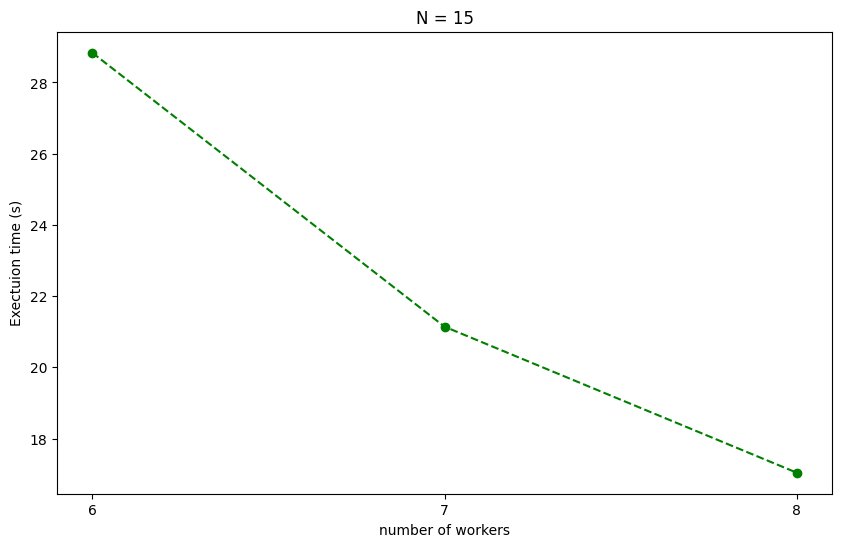

In [31]:
plt.figure(figsize=(10, 6))

plt.title("N = 15")
plt.xlabel("number of workers")
plt.ylabel("Exectuion time (s)")
plt.plot(queens,executions,"g--o",)
plt.xticks(ticks=queens, labels=queens)